# Generic tensor contractions

This first part is Almost literally copied from  G. Evenbly tensors.net tutorial 1

## Defining generic tensors  
Here we will start studying generic tensor networks and their contraction.
Part of any tensor network study is to understand how to contract some of the parts of the tensor networks, and eventually simplify them. 

The first task is to initialize tensors, we typically did this by creating vectors and reshaping them into higher dimensional tensors, today we will start with those higher dimensional tensors.
Let' s create a random tensor with three legs (an order 4 tensor) with size 2, 3, 4, 5 and call it A, remember we always work with complex tensors in quantum mechanics
and an order 3 tensor with size 4 5 6 and call it B

In [1]:
##### Lets initialize some tensors in Python/Numpy
import numpy as np
# tensor with randomly generated entries, order 3, dims: 2-by-3-by-4

A = np.random.rand(2,3,4,5) +1j*np.random.rand(2,3,4,5)
B = np.random.rand(4,5,6) +1j*np.random.rand(4,5,6)


Then we create an identity matrix that is 5 by 5 and call it C

In [2]:
# identity matrix, order 2, dims: 5-by-5 
C = np.eye(5,5)



Other special tensors are those made by all ones, that clearly can be multiplied by an arbitrary random complex constant, thus obtaining a tensor where each element is the same, create one that has order 4 and dimension 2, 4, 2, 4, create it and call it D

In [3]:
# tensor of 1's, order 4, dims: 2-by-4-by-2-by-4
D = (np.random.rand()+1j*np.random.rand())*np.ones((2,4,2,4))



Finally when a tensor only has few non-zero elements, one can create a tensor made of all zeros and fill the desider elements. E.g. create a tensor with order 2 made of zero and fill the first element with a random complex number

In [4]:
# matrix of 0's, order 2, dims: 3-by-5
D = np.zeros((3,5))+1j* np.zeros((3,5))
D[0,0] = np.random.rand()+1j*np.random.rand()

Now we can reorder the legs (permuting them which incurs in a computational cost proportional to the size of the tensor) or grouping or splitting the legs, which does not have a relevant computational cost (for large tensors) since it only changes the labels used to address the elements 
![reshape_permute](../pictures/reshape_permute.png "from G. Evenbly")
For example implement the above permutation and reshaping  for the tensor A  and B defined above

In [5]:
Atilda = A.transpose(3,0,1,2)
Btilda = B.reshape(4,30)

## Tensor contractions

We now enter the realm of tensor contractions. First of all  remeber that contracting two tensors means summing the product of the tensor elements, it is a generalization of matrix multiplication

$ M^i_k =\sum _j A^i_j * B^j_k$, in the theory material you have gone through the diagramatic (or Penrose) notation for such operations. So let's put them in practice here. 

We will start by contracting two tensors. This can be done in several ways.
Define a new tensor $B$ with order 4 and dimensions 3,4,2,5
Now contract it with the $A$ tensor defined above on the second and fifth leg
![Contraction between two tensors](../pictures/two_tensors_contract.png "For G. Evenbly")

First compute it using for loops

In [6]:
A = np.random.rand(2,3,4,5) +1j*np.random.rand(2,3,4,5)
B = np.random.rand(3,4,2,5) +1j*np.random.rand(3,4,2,5) 
C = np.zeros((A.shape[0],A.shape[2],B.shape[1],B.shape[2]))
C = C+1j*C 
for i in range(A.shape[0]):
    for m in range(A.shape[1]):
        for j in range(A.shape[2]):
            for n in range(A.shape[3]):
                for k in range(B.shape[1]):
                    for l in range(B.shape[2]):
                        C[i,j,k,l] += A[i,m,j,n]*B[m,k,l,n]
                       
                    


Now repeat the same operation by transforming the two tensors into matrix and then performing a matrix multiplication, call the resulting tensor $\tilde{C}$ and compare that the two methods provide the same result.
![Contraction as matrix multiplication](../pictures/contraction_as_matrix_multiplication.png "For G. Evenbly")


In [7]:
Ap = A.transpose(0,2,1,3); 
Bp = B.transpose(0,3,1,2)
App = Ap.reshape(A.shape[0]*A.shape[2],A.shape[1]*A.shape[3]);
Bpp = Bp.reshape(B.shape[0]*B.shape[3],B.shape[1]*B.shape[2])
Cpp = App @ Bpp;             
C_tilde= Cpp.reshape(A.shape[0],A.shape[2],B.shape[1],B.shape[2])
np.max(C-C_tilde)


(1.5543122344752192e-15+1.7763568394002505e-15j)

## Computational cost of tensor contractions. 

As you have seen in the theory material, contracting tensors comes at a cost, here there is the summary of that cost is in this picture from tensors.net 
![Cost of contraction](../pictures/contraction_cost.png "from G. Evenbly")


## More than 2 tensors 
When your network to contract include more than two tensors it is computationally advantageous to break the contraction into pairwise contractions. For example if you need to contract three tensors, and you do it in a single shot (by using for loops) you incur into a higher computational cost. Try it below follwing the diagarm. Contract it with for loops and by sequence of matrix multiplications.
![three_tensors](../pictures/three_tensors.png "from G. Evenbly")


In [8]:
d = 10
A = np.random.rand(d,d) 
B = np.random.rand(d,d)
C = np.random.rand(d,d)
# Evaluare network via summation over internal indices
F0 = np.zeros((d,d))
for di in range(d):
    for dj in range(d):
        for dk in range(d):
            for dl in range(d):
                F0[di,dj] = F0[di,dj] + A[di,dk]*B[dk,dl]*C[dl,dj]
            
# Evaluare network via sequence of binary contractions
F1 = (A @ B) @ C

In general the cost of the contraction of a tensor network depends on the order of the contraction. The picture below from tensors.net provide an explicit example 
![Cost of contraction](../pictures/order_cost.png "from G. Evenbly")


As an exercise find the optimal contraction sequence of this diagarm (from tensors.net) and write the code the performs the optimized contraction transforming the tensors to matrices and multiplying them.
 ![reshape_permute](../pictures/exercice.png "from G. Evenbly")
  Initialize the tensors as random tensors whose legs all share the same dimension $d=10$ 
  use the following convention for the ordering of indices
   ![reshape_permute](../pictures/oredering_indices.png "from G. Evenbly")


In [9]:
d=10
A = np.random.rand(d,d,d)+1j*np.random.rand(d,d,d)
B = np.random.rand(d,d,d,d)+1j*np.random.rand(d,d,d,d)
C = np.random.rand(d,d,d)+1j*np.random.rand(d,d,d)
D = np.random.rand(d,d)+1j*np.random.rand(d,d)


#First I contract C with D with cost d^4
Cp = C.reshape(d,d*d)
DC = (D@Cp).reshape(d,d,d)
# Then I contrac B with DC this has computational cost d^5
Bp = B.reshape(d*d,d*d)
DCp= DC.transpose(1,0,2).reshape(d*d,d)
BDC = (Bp@DCp).reshape(d,d,d)
#At last I absorb A into the contraction with cost d^4
BDCp = BDC.reshape(d,d*d)
Ap=A.transpose(0,2,1)
App=Ap.reshape(d*d,d)

E =BDCp@App


## Libraries to perform tensor contractions

We are now in position to use libraries 
Let's start by redefining the tensors, aslo since here we are interested in optimizing the contraction also import the time package and the matplotlib to perform 


In [10]:
import numpy as np
import matplotlib.pyplot as plt
import time 
d=10
A = np.random.rand(d,d,d)+1j*np.random.rand(d,d,d)
B = np.random.rand(d,d,d,d)+1j*np.random.rand(d,d,d,d)
C = np.random.rand(d,d,d)+1j*np.random.rand(d,d,d)
D = np.random.rand(d,d)+1j*np.random.rand(d,d)


We now retake the computation of the last class and check that the leading cost is actually  $d^5$
 , we define the function contraction_by_hand, that take the five tensors and perform the contraction using only transpose and reshape as last time,

In [11]:
def contraction_by_hand(A,B,C,D):
    d = A.shape[0]
    Cp = C.reshape(d,d*d)
    DC = (D@Cp).reshape(d,d,d)
# Then I contrac B with DC this has computational cost d^5
    Bp = B.reshape(d*d,d*d)
    DCp= DC.transpose(1,0,2).reshape(d*d,d)
    BDC = (Bp@DCp).reshape(d,d,d)
#At last I absorb A into the contraction with cost d^4
    BDCp = BDC.reshape(d,d*d)
    Ap=A.transpose(0,2,1)
    App=Ap.reshape(d*d,d)
    E=BDCp@App
    return E, DC,BDC

Now repeat the contraction for several d in the interval 2- collect the execution time and plot then in a log-log plot. (Why do we use a log-log plot?) On the x-axis put the bond dimension  d  and on the y-axis put the execution time  t
 

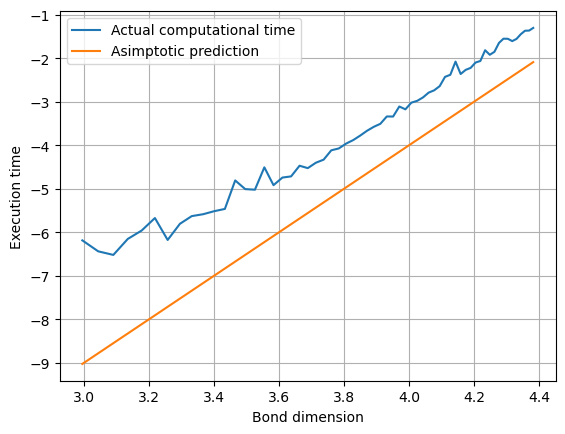

In [12]:
times_to_execute =[]
dmin=20
dmax=80
for d in range(dmin,dmax+1):
    A = np.random.rand(d,d,d)+1j*np.random.rand(d,d,d)
    B = np.random.rand(d,d,d,d)+1j*np.random.rand(d,d,d,d)
    C = np.random.rand(d,d,d)+1j*np.random.rand(d,d,d)
    D = np.random.rand(d,d)+1j*np.random.rand(d,d)
    t1 =time.time()
    E = contraction_by_hand(A,B,C,D)
    t2 =time.time()
    times_to_execute.append(t2-t1)
    
plt.plot(np.log(range(dmin,dmax+1)),np.log(times_to_execute),label ='Actual computational time')
plt.plot(np.log(np.linspace(dmin,dmax,dmax-dmin+1)),np.log(np.linspace(dmin,dmax,dmax-dmin+1)**5)-24, label ='Asimptotic prediction')      
plt.grid('on')
plt.xlabel('Bond dimension')
plt.ylabel('Execution time')
plt.legend()
plt.show()    



Now we define the same contraction but using ncon, and check that the result and scaling are the same than the contraction by hand (also check the intermediate steps).

In [13]:
from ncon import ncon
d=10
A = np.random.rand(d,d,d)+1j*np.random.rand(d,d,d)
B = np.random.rand(d,d,d,d)+1j*np.random.rand(d,d,d,d)
C = np.random.rand(d,d,d)+1j*np.random.rand(d,d,d)
D = np.random.rand(d,d)+1j*np.random.rand(d,d)




def contraction_with_einsum(A,B,C,D):
    d = A.shape[0]
    DC =np.einsum('ef,fgd->egd',D,C)
# Then I contrac B with DC this has computational cost d^5
    BDC =np.einsum('acge,egd->acd',B,DC)
#At last I absorb A into the contraction with cost d^4
    E = np.einsum('acd,cbd->ab',BDC,A)
    return E, DC, BDC
def contraction_with_ncon(A,B,C,D):
    d = A.shape[0]
    DCn=ncon([D,C],[[-1,1],[1,-2,-3]])
# Then I contrac B with DC this has computational cost d^5
    BDCn =ncon([B,DCn],[[-1,-2,1,2],[2,1,-3]])
#At last I absorb A into the contraction with cost d^4
    En =ncon([BDCn,A],[[-1,1,2],[1,-2,2]])
    
    return En, DCn, BDCn
def contraction_with_ncon_one_line(A,B,C,D):
    TensorArray = [A,B,C,D]
    IndexArray = [[4,-2,5],
    [-1,4,2,3],[1,2,5],[3,1]]
    E = ncon(TensorArray,IndexArray)
    return E

E1,DC1,BDC1 = contraction_by_hand(A,B,C,D)
E2,DC2,BDC2 =contraction_with_einsum(A,B,C,D)
E3,DC3,BDC3 =contraction_with_ncon(A,B,C,D)
E4 = contraction_with_ncon_one_line(A,B,C,D)
print('Difference in first partial contraction')
print(np.max(DC1-DC3))
print('Difference in second partial contraction')
print(np.max(BDC1-BDC3))
print('Difference in total contraction')

print(np.max(E1-E3))

print(np.max(E1-E4))



Difference in first partial contraction
0j
Difference in second partial contraction
0j
Difference in total contraction
0j
0j


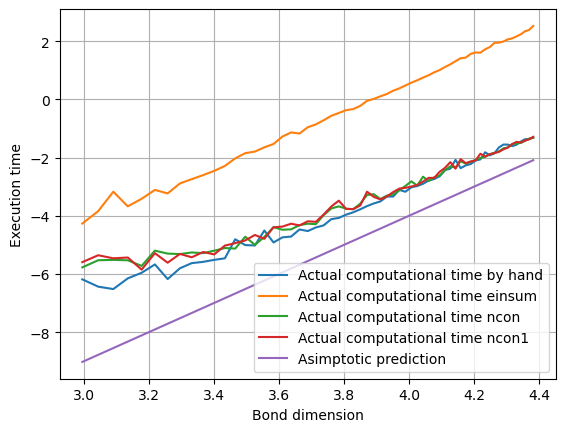

In [14]:
times_to_execute_by_hand =[]
times_to_execute_ncon =[]
times_to_execute_ncon1 =[]
times_to_execute_ein =[]

for d in range(dmin,dmax+1):
    A = np.random.rand(d,d,d)+1j*np.random.rand(d,d,d)
    B = np.random.rand(d,d,d,d)+1j*np.random.rand(d,d,d,d)
    C = np.random.rand(d,d,d)+1j*np.random.rand(d,d,d)
    D = np.random.rand(d,d)+1j*np.random.rand(d,d)
    
    t1 =time.time()
    E = contraction_by_hand(A,B,C,D)
    t2 =time.time()
    times_to_execute_by_hand.append(t2-t1)
    
    t1e =time.time()
    E = contraction_with_einsum(A,B,C,D)
    t2e =time.time()
    times_to_execute_ein.append(t2e-t1e)
    
    t1n =time.time()
    E = contraction_with_ncon(A,B,C,D)
    t2n =time.time()
    times_to_execute_ncon.append(t2n-t1n)
    
    t1n1 =time.time()
    E = contraction_with_ncon_one_line(A,B,C,D)
    t2n1 =time.time()
    times_to_execute_ncon1.append(t2n1-t1n1)
    
plt.plot(np.log(range(dmin,dmax+1)),np.log(times_to_execute),label ='Actual computational time by hand')
plt.plot(np.log(range(dmin,dmax+1)),np.log(times_to_execute_ein),label ='Actual computational time einsum')
plt.plot(np.log(range(dmin,dmax+1)),np.log(times_to_execute_ncon),label ='Actual computational time ncon')
plt.plot(np.log(range(dmin,dmax+1)),np.log(times_to_execute_ncon1),label ='Actual computational time ncon1')

plt.plot(np.log(np.linspace(dmin,dmax,dmax-dmin+1)),np.log(np.linspace(dmin,dmax,dmax-dmin+1)**5)-24, label ='Asimptotic prediction')      
plt.grid('on')
plt.xlabel('Bond dimension')
plt.ylabel('Execution time')
plt.legend()
plt.show()  

### Norm of an MPS
Define the MPS by a list of $N$ three leg tensors (the boundary tensors only have 2 legs) with size $D,D,d$, order their leg as in the drawing,

![](../pictures/mps_norm.png)

Define a function that computes the norm of the MPS, (its leading cost should scale as $N d^2 D^3$)  and check it by running the code for different $D$ in the range $D=200-800$. Plot the log-log plot of the time it requires versus the bond dimension and plot the theoretical expectation, to check that your contractions performs as it should